<div style="background-color:white;" >
<div style="clear: both; display: table;">
  <div style="float: left; width: 14%; padding: 5px; height:auto">
    <img src="img/TUBraunschweig_CO_200vH_300dpi.jpg" alt="TU_Braunschweig" style="width:100%">
  </div>
  <div style="float: left; width: 28%; padding: 5px; height:auto">
    <img src="img/TU_Clausthal_Logo.png" alt="TU_Clausthal" style="width:100%">
  </div>
  <div style="float: left; width: 25%; padding: 5px; height:auto">
    <img src="img/ostfalia.jpg" alt="Ostfalia" style="width:100%">
  </div>
  <div style="float: left; width: 21%; padding: 5px;">
    <img src="img/niedersachsen_rgb_whitebg.png" alt="Niedersachsen" style="width:100%">
  </div>
  <div style="float: left; width: 9%; padding: 5px;">
    <img src="img/internet_BMBF_gefoerdert_2017_en.jpg" alt="bmbf" style="width:100%">
  </div>
</div>
<div style="text-align:center">
<img src="img/ki4all.jpg" alt="KI4ALL-Logo" width="200"/>
</div>
</div>

# Synthetic Biomedical Data – Lesson 2b: Data Generation Basics (Part 2)

Part of the *Microcredit Synthetic Biomedical Data*.

➡️ [Back to Lesson 2a: Data Generation Basics (Part 1)](02a_data_generation_intro.ipynb)
➡️ [Module Overview (README)](../README.md)

---

*Before continuing, please make sure you have completed Lesson 2a (generation, class distribution, scatterplots).*

# Lesson 2b: Feature Distributions and Effect Size

---

### Recap from Lesson 2a
In the previous notebook, you:
- Generated a small synthetic dataset using `make_classification`.
- Inspected the **class distribution** to check balance.
- Created a **scatterplot** of two features to see if classes are separable.

This gave us a first hands-on sense of how synthetic datasets look and how separability can vary.

---

### Learning Goals for Lesson 2b
After completing this notebook, you will be able to:
1. Visualize the **class-conditional distributions** of all features.
2. Distinguish **informative** features from **irrelevant (noise)** features by inspection.
3. Quantify group differences using **effect size** measures:
   - Cohen’s d (parametric, based on means and standard deviations)
   - Cliff’s delta (non-parametric, based on ranks/overlap)
4. Relate **visual impressions** (histograms) to **numeric measures** (effect size).
5. Explain why effect size is important in biomedical research, beyond just p-values.

---

### Motivation
Looking at individual scatterplots is helpful, but real datasets often have **dozens or thousands of features**.
We need systematic ways to:
- Inspect how features are distributed across classes.
- Identify which features are informative.
- Put a **number** on the strength of class separation (effect size).

Synthetic data lets us practice these steps in a controlled environment.


### Lesson 2b.1 — Feature distributions per class

We now examine how each feature is distributed for each class:
- Are the distributions **shifted** (different means)?
- Are they **spread differently** (different variances)?
- Do some features look **uninformative** (almost identical curves)?

> **Why this matters:**
> Visual differences between class-conditional distributions often indicate **predictive signal**.
> If curves overlap almost perfectly, the feature may be **uninformative** for classification.

In [2]:
# Generate a synthetic toy dataset
import pandas as pd
from sklearn.datasets import make_classification

from utils import compute_all_effect_sizes

# Generate dataset (adjust n_features to match the number of subplots!)
x, y = make_classification(
    n_samples=30,  # number of samples
    n_features=8,  # total features
    n_informative=3,  # number of informative features
    n_classes=2,  # number of classes
    class_sep=1.5,  # how well classes are separated
    random_state=42,  # for reproducibility
)

feature_names = [f"feature_{i}" for i in range(x.shape[1])]
df = pd.DataFrame(x, columns=feature_names)
df["class"] = y

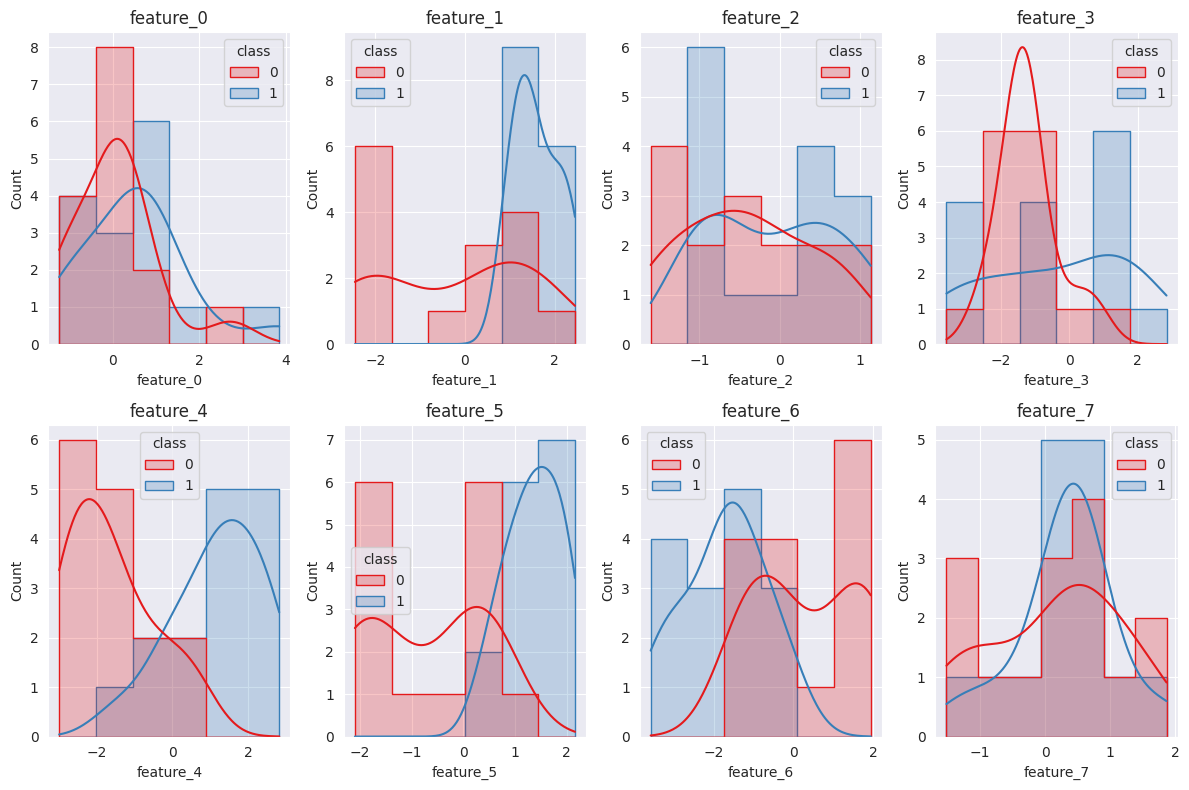

In [3]:
# Visualize feature distributions per class
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

for i, col in enumerate(feature_names, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns of plots
    sns.histplot(data=df, x=col, hue="class", kde=True, element="step", palette="Set1")
    plt.title(col)

plt.tight_layout()
plt.show()

#### Interpretation & Takeaways
- Features with **clearly different** class-conditional distributions may be informative.
- Features with **almost identical** distributions across classes are likely **irrelevant** (or need interactions to show signal).
- Synthetic data is great for demonstrating both cases on purpose.

### Mini-Challenge (2–3 minutes)
Regenerate the dataset with:
- `n_informative=3`
- `class_sep=1.5`

Then re-run the scatterplot and histograms.

**Question:** Which features became more/less informative? Why?

### Lesson 2b.2 — Effect Size: Quantifying the Visual Difference

When comparing distributions between two classes, it is useful to
quantify **how large the difference is**.
This is called **effect size**.

- **Cohen’s d** measures the difference in means between two groups, scaled by their variability.
  - Small ≈ 0.2, Medium ≈ 0.5, Large ≈ 0.8.
- **Cliff’s delta** measures the proportion of non-overlap between distributions.
- These measures tell us whether a feature difference is **practically important**,
  not just statistically significant.

For example:
- A feature with almost no overlap between healthy and diseased groups
  will have a **large effect size**.
- A feature where the two distributions nearly overlap will have a **small effect size**.

---

**Reflection**
- Identify 1–2 features that look **most** and **least** informative.
  - Now, calculate their effect sizes (e.g., Cohen’s d).
  - Does the quantitative measure match your visual impression?
- What happens if you **add noise** during data generation?
  - How does the effect size change?
- How would you explain to a colleague the difference between a
  **statistically significant** result and a **large effect size**?

### Quantifying group differences with effect size

Looking at histograms is useful, but sometimes visual impressions can be misleading.
We need a **numeric measure** of how strongly two groups differ.

One common measure is **Cohen’s d**:

\[
d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}
\]

where \(\bar{x}_1\) and \(\bar{x}_2\) are the means of the two groups, and \(s_p\) is the pooled standard deviation.

- **Small effect** ≈ 0.2
- **Medium effect** ≈ 0.5
- **Large effect** ≈ 0.8 or higher

By computing Cohen’s d, we can confirm whether a feature shows a **practically meaningful difference** between classes.


In [4]:
effect_sizes = compute_all_effect_sizes(x=x, y=y, labels=(0, 1))
display(effect_sizes)

,|effect_size|,cohens_d
feature,,
feature_4,2.411904,2.411904
feature_5,2.342270,2.342270
feature_6,1.747545,-1.747545
feature_1,1.533721,1.533721
feature_3,0.524139,0.524139
feature_0,0.429362,0.429362
feature_2,0.413627,0.413627
feature_7,0.211115,0.211115


#### Interpretation
- The printed values of Cohen’s d show the **magnitude of difference** between classes for each feature.
- A large value (e.g., > 0.8) means the feature strongly separates the two classes.
- A small value (close to 0) means there is almost no separation, even if the histograms looked slightly different.

**Reflection**
- Compare the numbers with the histograms you saw earlier.
  - Does a feature with large \(d\) also look well-separated visually?
  - Does a feature with small \(d\) look overlapping in the plots?
- What happens if you add **noise** during dataset generation?
  - How do the Cohen’s d values change?


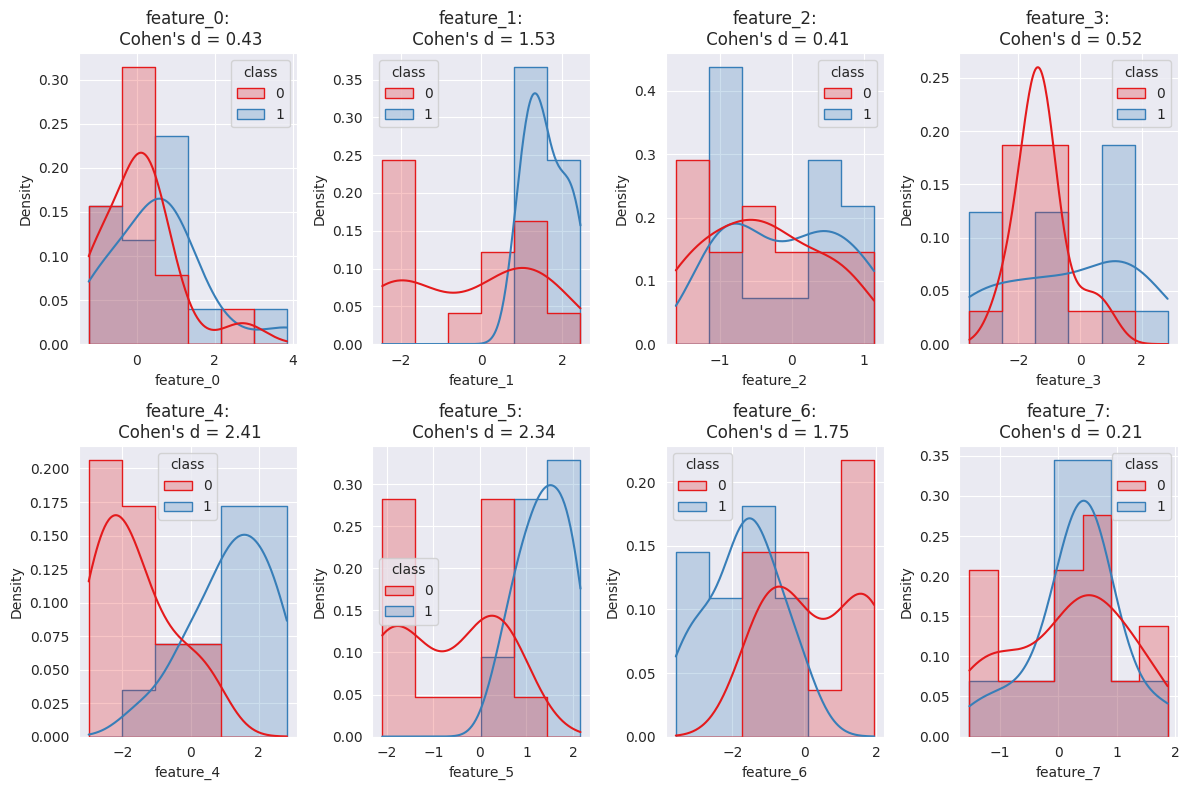

In [13]:
# Visualize feature distributions with effect sizes in titles
plt.figure(figsize=(12, 8))
for i, name in enumerate(feature_names, 1):
    plt.subplot(int(len(feature_names) / 4), 4, i)
    sns.histplot(data=df, x=name, hue="class", kde=True, element="step", palette="Set1", stat="density")
    d = effect_sizes.at[name, '|effect_size|']
    plt.title(f"{name}:\n Cohen's d = {d:.2f}")

plt.tight_layout()
plt.show()

#### Visualizing effect size together with distributions

The plots now show both the histogram distributions and the calculated Cohen’s d in the title.
This makes it easy to directly **connect the numeric measure to the visual impression**.

- Features with **large d** show two distributions with little overlap.
- Features with **small d** show heavy overlap between the two classes.

**Reflection**
- Do the Cohen’s d values match your intuition from the plots?
- Which feature seems the most useful for classification based on effect size?
- How might this help in **feature selection**, when many features compete for attention?


### Another measure: Cliff’s delta

Cohen’s d assumes **normally distributed data** and compares group means.
But sometimes distributions are not normal, or the means don’t capture
the important differences (e.g., skewed or heavy-tailed data).

An alternative is **Cliff’s delta (δ)**:

$$
\delta = \frac{N(x > y) - N(x < y)}{n_x \cdot n_y}
$$

Here, \(N(x > y)\) is the number of all cross-group pairs where a value from group 1
is larger than a value from group 2 (analogous for \(N(x < y)\)).

Cliff’s delta measures how often values from one group are **larger or smaller** than values from the other group.
- Range: **-1 to +1**
  - δ = +1 → all values in group 1 > group 2
  - δ = -1 → all values in group 1 < group 2
  - δ = 0 → complete overlap (no difference)

This is a **non-parametric effect size**: it does not assume normality.

In [7]:
effect_sizes_cliffs_delta = compute_all_effect_sizes(x=x, y=y, method="cliffs_delta", labels=(0, 1))
print("Cliff's delta:")
display(effect_sizes_cliffs_delta)

Cliff's delta:


,|effect_size|,cliffs_delta
feature,,
feature_5,0.955556,0.955556
feature_4,0.902222,0.902222
feature_6,0.786667,-0.786667
feature_1,0.706667,0.706667
feature_0,0.360000,0.360000
feature_3,0.333333,0.333333
feature_2,0.200000,0.200000
feature_7,0.084444,0.084444


#### Interpretation
- Cliff’s delta values closer to **±1** indicate strong separation between groups.
- Values near **0** mean the two groups overlap heavily.
- Positive δ means group 1 tends to have larger values; negative δ means group 2 tends to have larger values.

**Reflection**
- Compare Cohen’s d and Cliff’s delta for the same features:
  - Do they agree on which feature is most informative?
  - Which measure do you prefer if the distributions are skewed?
- Inspect Cliff’s delta on a feature with heavy overlap — does it confirm your visual impression?

In [8]:
print("Comparison of Cohen's d and Cliff's delta:")
effect_sizes["cliffs_delta"] = effect_sizes_cliffs_delta["cliffs_delta"]
display(effect_sizes[["cohens_d", "cliffs_delta"]])

Comparison of Cohen's d and Cliff's delta:


,cohens_d,cliffs_delta
feature,,
feature_4,2.411904,0.902222
feature_5,2.342270,0.955556
feature_6,-1.747545,-0.786667
feature_1,1.533721,0.706667
feature_3,0.524139,0.333333
feature_0,0.429362,0.360000
feature_2,0.413627,0.200000
feature_7,0.211115,0.084444


### Quick Takeaway from Lesson 2
- We can easily generate a synthetic dataset with controlled samples, features, and classes.
- Visual exploration (scatterplots, histograms) helps us identify which features separate classes well and which do not.
- Not all features are informative — some behave like noise and add no predictive value.
- Effect size (e.g., Cohen’s d, Cliff’s delta) provides a **numeric measure** of how strongly two groups differ, complementing what we see in the plots.
- These simple datasets give us a safe playground to understand the basics before moving to more complex cases (irrelevant features, correlations, pseudo-classes, and random effects).

---

## Next Steps

In this lesson, you learned how to:
- Generate and inspect a synthetic dataset.
- Explore class balance, separability, and feature distributions.
- Quantify group differences with **effect size measures**.

This gave you a **basic toolkit** for working with synthetic biomedical data.

---

### Coming up in Lesson 3a: Irrelevant Features

Real datasets often contain measurements that are **completely unrelated** to the outcome.
In the next lesson, you will:

- Add irrelevant (noise) features to a dataset.
- Explore how noise affects visualization and model training.
- Understand why feature selection becomes important when noise is present.

➡️ Continue with: **[`03a_irrelevant_features_noise.ipynb`](03a_irrelevant_features_noise.ipynb)`**